In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

colors = [(1, 0, 0), (0, 0, 1)]  # R -> B
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
# Create the colormap
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=100)

In [49]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/ML_project/runs_colab_gpu.csv")

new_cols = pd.DataFrame()
new_cols['images'] = df.classes * df.samples
new_cols['pixels'] = new_cols.images * df.image_height * df.image_width
new_cols['connections'] = df.dense_layer_1 * df.dense_layer_2 + df.dense_layer_2 * df.classes
new_cols['training_time_total'] = df.training_time_hours * 3600 + df.training_time_minutes * 60 + df.training_time_seconds
new_cols['training_time_per_epoch'] = new_cols.training_time_total / df.epochs
df['training_perc'] = (df.training*100).round(0).astype(int)
new_cols['model_file'] = df.agg('vgg16_{0[classes]}_{0[samples]}_{0[image_height]}_{0[training_perc]}_{0[dense_layer_1]}x{0[dense_layer_2]}.h5'.format, axis=1)

df = pd.concat([df.loc[:, :'samples'], 
           new_cols['images'], 
           df.loc[:, 'image_height':'image_width'],
           new_cols['pixels'],
           df.loc[:, 'training':'dense_layer_2'],
           new_cols['connections'],
           df.loc[:, 'batch_size':'training_time_seconds'],
           new_cols[['training_time_total','training_time_per_epoch']]           
          ],axis=1, join='inner')
df = df.sort_values(by=['accuracy', 'loss'], ascending=(False, True))
print("Rows:", df.shape[0])
df.head()

Rows: 24


,classes,samples,images,image_height,image_width,pixels,training,dense_layer_1,dense_layer_2,connections,batch_size,learning_rate,patience,epochs,accuracy,loss,training_time_hours,training_time_minutes,training_time_seconds,training_time_total,training_time_per_epoch
21,2,400,800,224,224,40140800,0.9,512,512,263168,32,0.001,10,48,1.0000,0.0254,0,13,15,795,16.562500
20,2,200,400,224,224,20070400,0.9,512,512,263168,32,0.001,10,50,0.9500,0.1950,0,6,44,404,8.080000
19,2,100,200,224,224,10035200,0.9,512,512,263168,32,0.001,10,27,0.9500,0.2050,0,1,53,113,4.185185
13,3,400,1200,224,224,60211200,0.8,2048,2048,4200448,32,0.001,10,31,0.8875,0.4112,0,12,25,745,24.032258
1,3,400,1200,224,224,60211200,0.9,1024,1024,1051648,32,0.001,5,21,0.8750,0.4472,0,7,38,458,21.809524


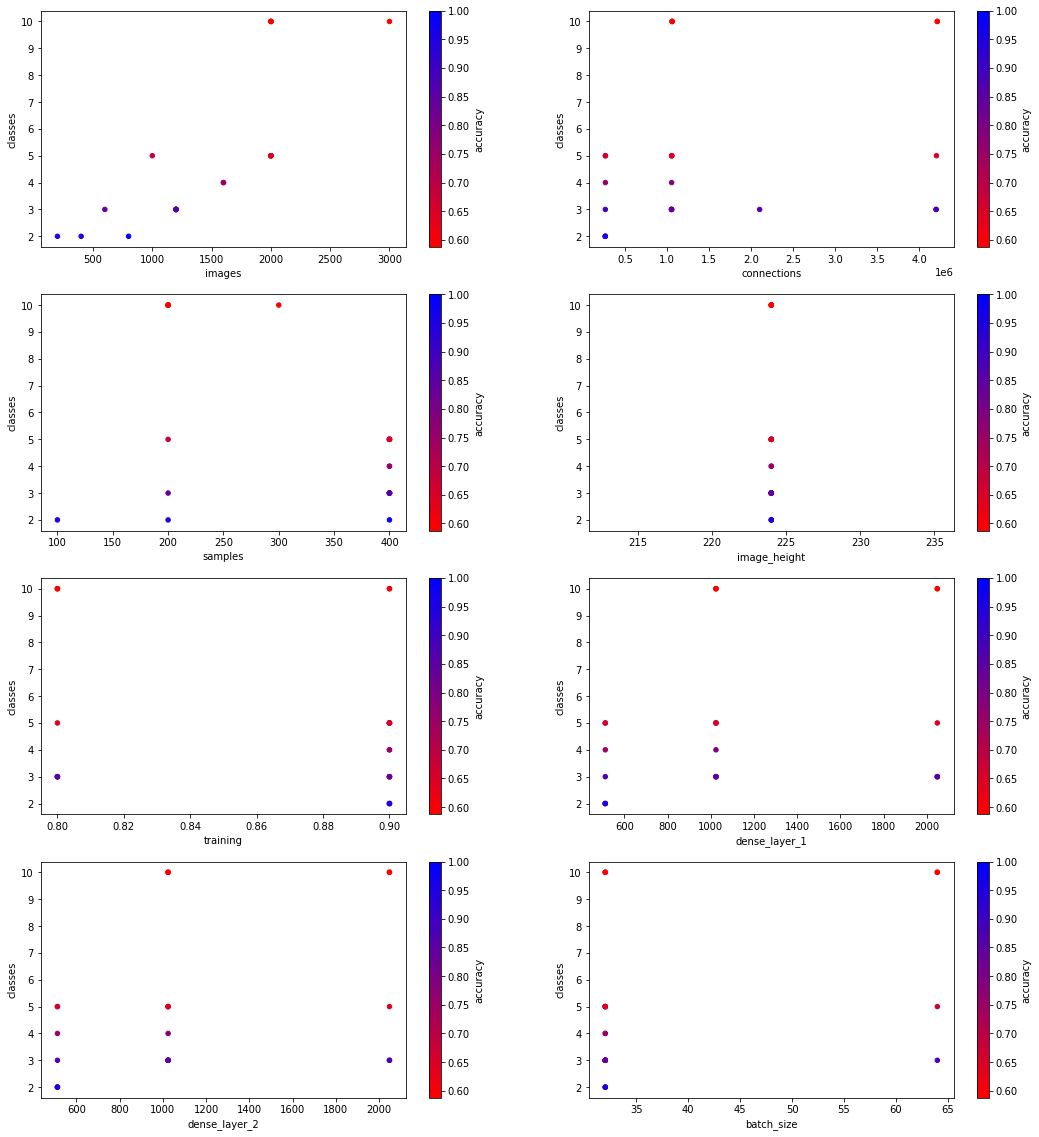

In [50]:
fig, ax = plt.subplots(4, 2, figsize=(18,20))

df.plot.scatter(ax=ax[0][0], x='images', y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[0][1], x='connections', y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[1][0], x='samples', y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[1][1], x='image_height', y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[2][0], x='training',  y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[2][1], x='dense_layer_1',  y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[3][0], x='dense_layer_2',  y='classes', c='accuracy', cmap=cm)
df.plot.scatter(ax=ax[3][1], x='batch_size',  y='classes', c='accuracy', cmap=cm)

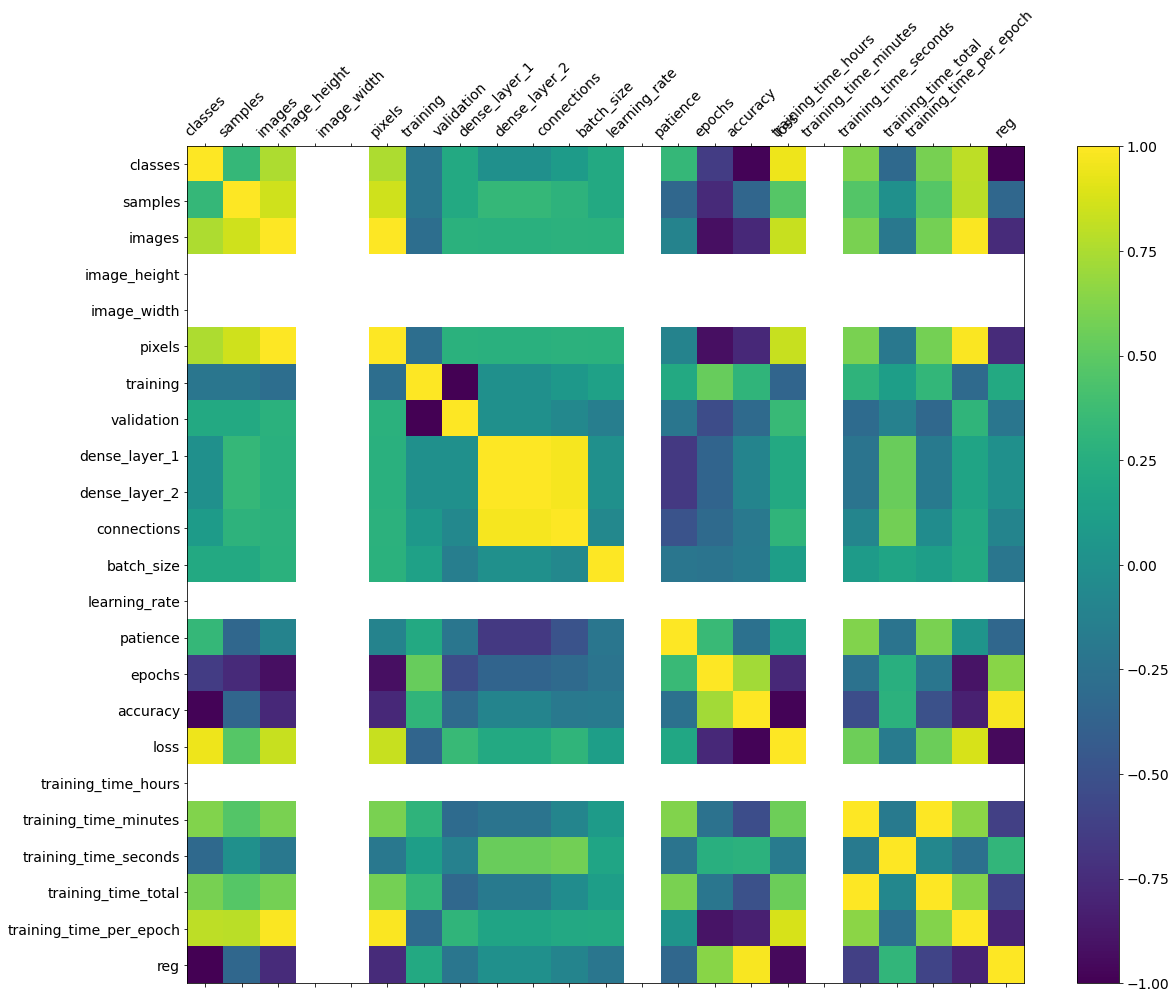

In [ ]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)